In [1]:
import numpy as py
import pandas as pd
import seaborn as sns
from scipy import stats

data = pd.read_csv("Financial Distress.csv")

Null Values any:  False
Outliers are present


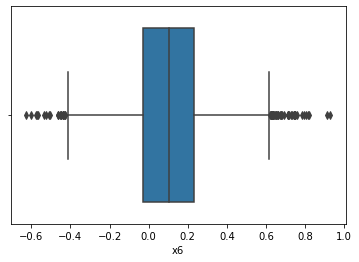

In [2]:
#Feature Selection
X = data.drop(['Company','Time','Financial Distress'],1)

#Target Value
Y = data[['Financial Distress']]

#Data is returning only 5 values
data.head(5)

#No null values in the data
print("Null Values any: ", data.isnull().values.any())

#box plot
sns.boxplot(x=data['x6'])
print("Outliers are present")

# #zscore
# print(stats.zscore(data) < 3)

In [25]:
#Data is not skewed. It is both positive and negatively skewed.
skewvalues = X.skew(axis = 0)
print(skewvalues)
print("Data with Skew value = 0 ", (skewvalues == 0).any())

x1     2.264785
x2     0.622693
x3    -0.791539
x4     0.881630
x5     0.473657
         ...   
x79    0.115536
x80   -1.483148
x81    0.867730
x82   -0.437312
x83   -0.895814
Length: 83, dtype: float64
Data with Skew value = 0  False


In [26]:
X.x1.describe()

count    3672.000000
mean        0.191179
std         0.071333
min         0.000000
25%         0.153056
50%         0.181808
75%         0.217195
max         1.000000
Name: x1, dtype: float64

In [27]:
# #histogram for unskew data
# def plotHistogram(data):
#     for i in data:
#         data[i].hist()

        
# plotHistogram(X)

In [28]:
z = py.abs(stats.zscore(data))
print(z)
threshold = 3
print(py.where(z > 2))
# filtered_entries = (z < threshold)
# new_df = data[filtered_entries]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Q1 = data_o1.quantile(0.25)
# Q3 = data_o1.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

[[1.54761503 1.60659116 0.38826272 ... 0.39008035 1.78324392 1.16352511]
 [1.54761503 1.3604956  0.56421656 ... 0.40874018 1.88890058 1.23645023]
 [1.54761503 1.11440004 0.51497576 ... 0.58373692 1.99455724 1.30937536]
 ...
 [2.05040802 1.10045999 0.20343663 ... 0.23180522 0.75251599 0.72597437]
 [2.05040802 1.34655554 0.16185836 ... 0.22491945 0.64685932 0.79889949]
 [2.05040802 1.5926511  0.19669421 ... 0.18356734 0.54120266 0.87182462]]
(array([   0,    0,    0, ..., 3671, 3671, 3671]), array([39, 43, 71, ..., 53, 77, 82]))
Company               184.250000
Time                    7.000000
Financial Distress      1.179475
x1                      0.554330
x2                      0.139984
                         ...    
x79                     9.100000
x80                    12.000000
x81                     1.165137
x82                    11.000000
x83                    23.000000
Length: 86, dtype: float64


In [6]:
#Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
#Replacing the continous value with binary value for output
arr = []
for i in Y['Financial Distress']:
    assigned_class = 1
    if i > -0.5:
        assigned_class = 0
    arr.append(assigned_class)
y_class = py.array(arr)

In [8]:
#Split Training and test data sample
X_train, X_test, y_train, y_test = train_test_split(X,y_class,test_size=0.25,random_state=1)

In [9]:
#Logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print("Without any pre processing, the accuracy score is -", accuracy*100)
cm = confusion_matrix(y_test, y_pred) 

Without any pre processing, the accuracy score is - 94.98910675381264


/Users/riddhij/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
#Data is not skewed. It is both positive and negatively skewed.
skewvalues = X.skew(axis = 0)
print(skewvalues)
print("Data with Skew value = 0 ", (skewvalues == 0).any(), "\n")

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

# Method to normalize skew data using log tranformation + normalization
def normalizeData(data):
    for i in data:
        print(i)
#         sns.boxplot(x=data[i])
        print("before", data[i].skew())
        #Plus one to avoid nan after skewing
        data[i] = normalize(py.log(data[i]+1))
        print("after", data[i].skew())
#         sns.boxplot(x=data[i])

normalizeData(X)

#After Skewing, nan
for i in range(79):
    a = 'x'+str(i+1)
    print(X[a].name, X[a].isnull().values.any())

x1     1.536796
x2     0.305825
x3    -1.101514
x4     0.368170
x5     0.170133
         ...   
x79   -0.060317
x80   -1.998351
x81    0.539916
x82   -0.808679
x83   -1.148254
Length: 83, dtype: float64
Data with Skew value = 0  False 

x1
before 1.5367958537981399
after 0.9809015117262845
x2
before 0.3058249414385849
after -0.024590334882904175
x3
before -1.101513509064177
after -1.4458038285964128
x4
before 0.3681696467376423
after -0.09848395597959987
x5
before 0.17013316756568342
after -0.16494276341667888
x6
before -0.9427928227757434
after -1.3766127305604812
x7
before 1.5770088746476578
after 1.0256194066988296
x8
before 12.426883238922695
after 7.999804113019691
x9
before -3.8885953491341083
after -5.84983369715192
x10
before 0.2854445572355068
after -0.01002426879218016
x11
before -1.212456415522654
after -1.5708612912344186
x12
before 2.4720079158749577
after 2.0863227697305806
x13
before -0.04129674187713865
after -0.32245321400417565
x14
before 0.39076697247531517
after 0.0